# Challenge 3

In this challenge we will work on the `Orders` data set. In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

## Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

In [1]:
import numpy as np
import pandas as pd

Next, import `Orders` from Ironhack's database into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [11]:
orders = pd.read_csv('Orders.csv',index_col = 0)

In [12]:
orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

In [4]:
customer_spending = orders.groupby('CustomerID')['amount_spent'].sum().reset_index()
customer_spending

,CustomerID,amount_spent
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


In [5]:
customer_spending.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4339.0,15299.936852,1721.889758,12346.0,13812.500,15299.00,16778.50,18287.00
amount_spent,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


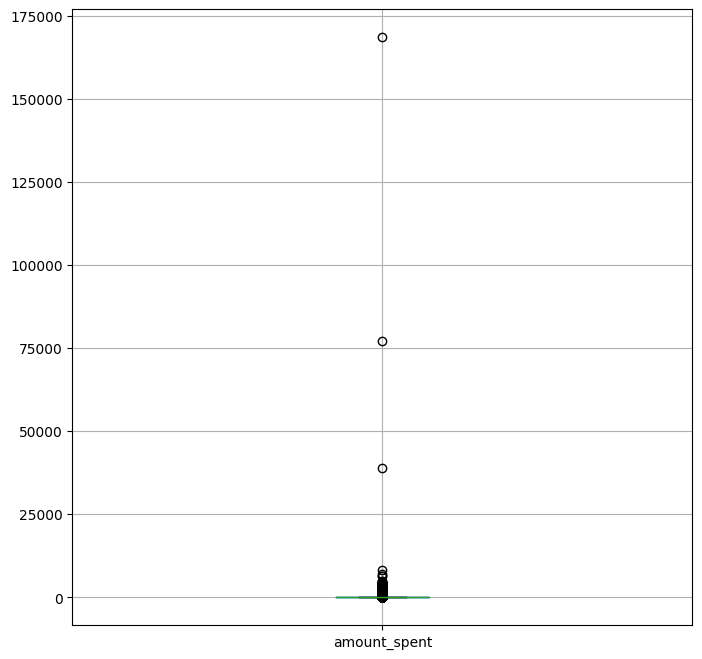

In [6]:
orders[['amount_spent']].boxplot(figsize=(8, 8));

In [14]:
q1 = customer_spending ['amount_spent'].quantile(0.25)
q3 = customer_spending ['amount_spent'].quantile(0.75)

vip_customers = customer_spending[(customer_spending['amount_spent']>= q3)]

vip_customers.sort_values ('amount_spent', ascending= False)

,CustomerID,amount_spent
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194550.79
3009,16446,168472.50
1880,14911,143825.06
...,...,...
3880,17656,1674.69
2764,16115,1667.97
438,12912,1662.30
147,12530,1662.28


In [36]:
orders['VIP'] = np.where(orders['amount_spent'] > 1661.64, True,False)
orders['VIP'].value_counts()

VIP
False    397792
True        132
Name: count, dtype: int64

In [60]:
orders['Preferred'] = np.where((orders['amount_spent'] < 1661.64) & (orders['amount_spent'] > 674.45), True, False)
orders['Preferred'].value_counts()

Preferred
False    397481
True        443
Name: count, dtype: int64

In [54]:
vip_customers = orders[orders['VIP'] == True].groupby('CustomerID')['amount_spent'].sum().reset_index()

vip_customers = vip_customers.sort_values(by='amount_spent', ascending = False)

vip_customers


,CustomerID,amount_spent
26,16446,168469.60
35,18102,82777.06
29,17450,81794.40
0,12346,77183.60
18,15749,44534.30
14,15098,38970.00
33,17949,21001.80
23,16029,16326.75
3,12744,10504.05
6,12931,8578.20


In [61]:
preferred_customers = orders[orders['Preferred'] == True].groupby('CustomerID')['amount_spent'].sum().reset_index()

preferred_customers = preferred_customers.sort_values(by='amount_spent', ascending = False)

preferred_customers

,CustomerID,amount_spent
69,18102,97331.56
60,17450,59847.89
66,17949,25450.71
39,16029,18689.44
23,14156,16578.20
...,...,...
31,15482,716.40
36,15971,708.00
32,15502,705.50
1,12432,700.00


Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

## Q2: How to identify which country has the most VIP Customers?

In [79]:
unique_customers = orders.drop_duplicates(subset=['CustomerID'])

country_vip_counts = unique_customers.groupby('Country')['VIP'].sum().reset_index()

most_vip_country = country_vip_counts[country_vip_counts['VIP'] == country_vip_counts['VIP'].max()]

most_vip_country





,Country,VIP
35,United Kingdom,8


## Q3: How to identify which country has the most VIP+Preferred Customers combined?

In [83]:
orders['VIP+Preferred'] = orders['VIP'] | orders['Preferred']

country_vip_preferred_counts = orders[orders['VIP+Preferred'] == True].groupby('Country').size().reset_index(name='VIP+Preferred Customer Count')

most_vip_preferred_country = country_vip_preferred_counts[country_vip_preferred_counts['VIP+Preferred Customer Count'] == country_vip_preferred_counts['VIP+Preferred Customer Count'].max()]

most_vip_preferred_country


,Country,VIP+Preferred Customer Count
11,United Kingdom,496
